In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_listings_temp.csv')
df = df[["scores", "city", "date"]]
df.head()

C:\Users\bouab\AppData\Local\Temp\ipykernel_14368\3823883662.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_listings_temp.csv')


,scores,city,date
0,0.0000,Paris,2017-07-21
1,0.0000,Paris,2017-07-23
2,0.9299,Paris,2012-06-18
3,0.9041,Paris,2012-07-03
4,0.9915,Paris,2012-07-06


In [3]:
df['date'] = pd.to_datetime(df.date)

In [4]:
# drop all dates that have less than 30 reviews (scores)
df2 = df.groupby('date').filter(lambda x: len(x) > 30)
df2

,scores,city,date
0,0.0000,Paris,2017-07-21
1,0.0000,Paris,2017-07-23
2,0.9299,Paris,2012-06-18
3,0.9041,Paris,2012-07-03
6,0.8990,Paris,2012-08-14
...,...,...,...
729531,0.0000,Hong Kong,2023-01-19
729532,0.9552,Hong Kong,2023-01-28
729533,0.9078,Hong Kong,2023-02-02
729534,-0.9398,Hong Kong,2023-02-28


In [5]:
data = df2.groupby('date').mean()
data

C:\Users\bouab\AppData\Local\Temp\ipykernel_14368\1343075523.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df2.groupby('date').mean()


,scores
date,
2011-09-20,0.918373
2011-10-03,0.929113
2011-10-17,0.883712
2011-10-18,0.919748
2011-11-01,0.906500
...,...
2023-03-24,0.658815
2023-03-25,0.669213
2023-03-26,0.576917


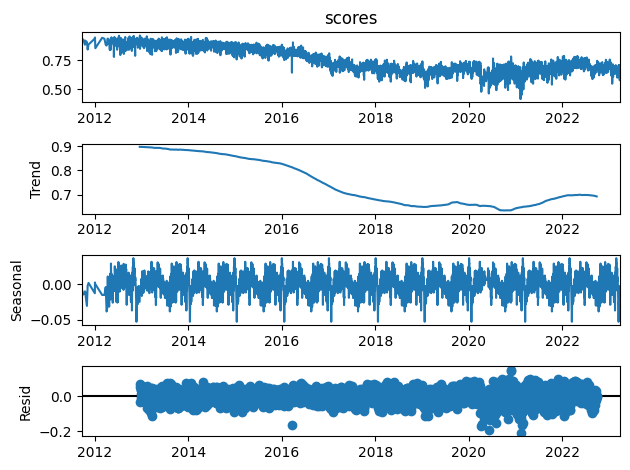

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data.scores, model='additive', period=365)
decomp.plot()
plt.show()

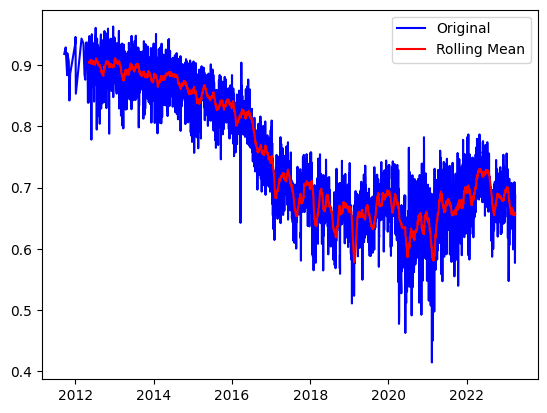

In [7]:
rolling_mean = data['scores'].rolling(window=30).mean()
rolling_std = data['scores'].rolling(window=30).std()

plt.plot(data['scores'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.legend()
plt.show()

In [8]:
# Split the index for data
# into three columns containing the year, month, and day

data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day

C:\Users\bouab\AppData\Local\Temp\ipykernel_14368\1672106161.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(list(range(1, 13)))
C:\Users\bouab\AppData\Local\Temp\ipykernel_14368\1672106161.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(list(range(1, 13)))
C:\Users\bouab\AppData\Local\Temp\ipykernel_14368\1672106161.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(list(range(1, 13)))
C:\Users\bouab\AppData\Local\Temp\ipykernel_14368\1672106161.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(list(range(1, 13)))
C:\Users\bouab\AppData\Local\Temp\ipykernel_14368\1672106161.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(list(range(1, 13)))
C:\Users\bouab\AppData\Local\Temp\ipykernel_14368\1672106161.py:1

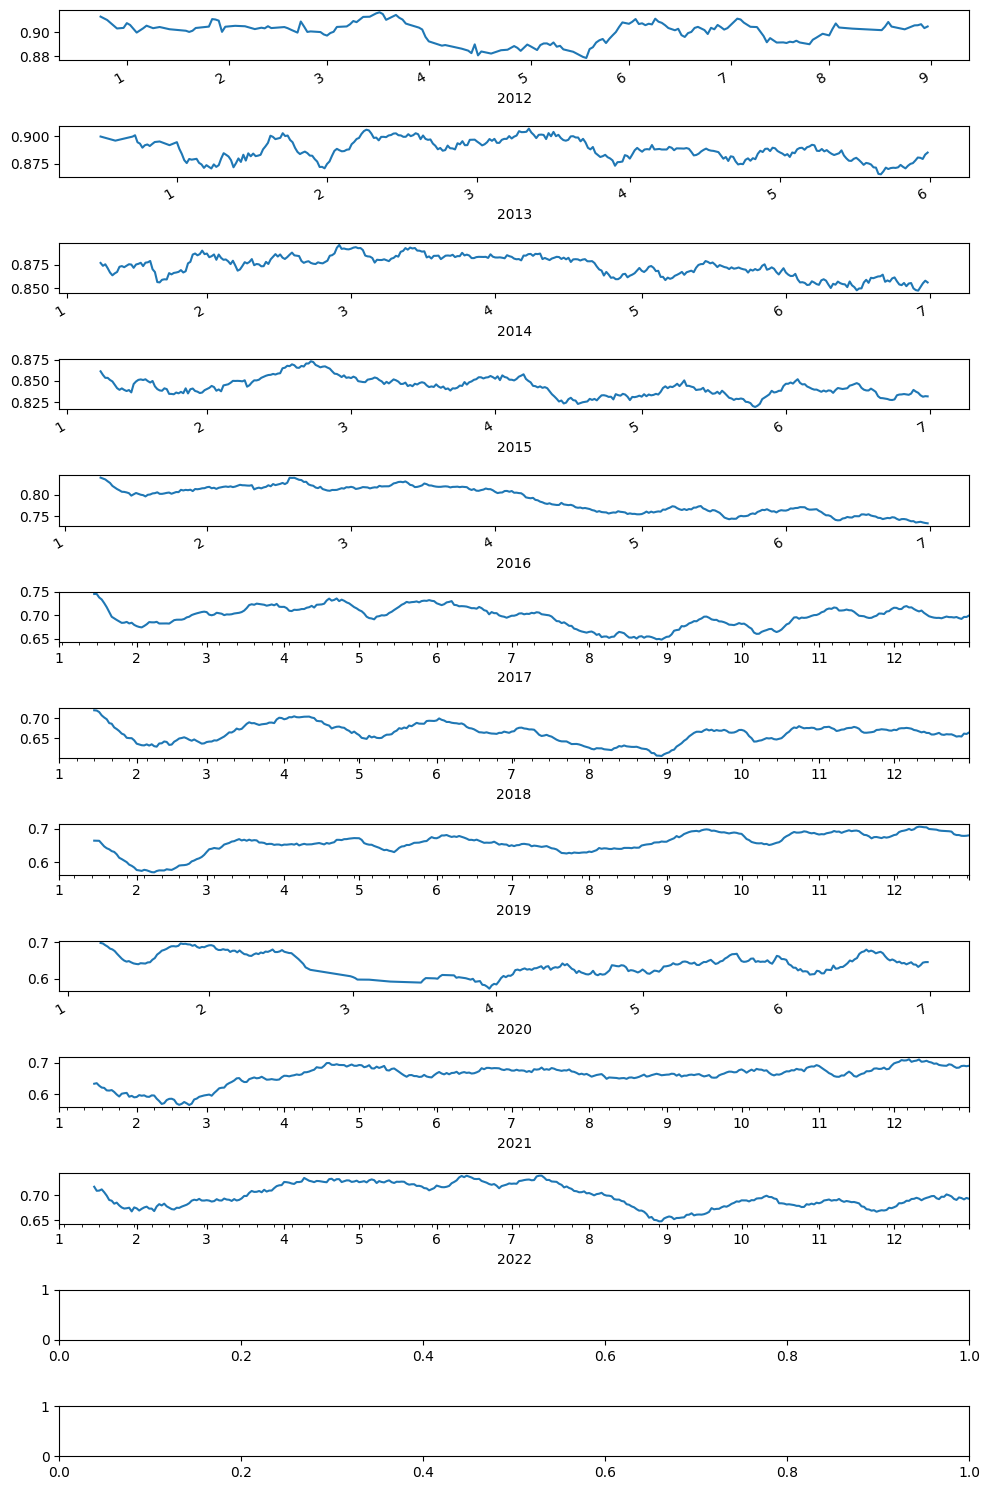

In [9]:


# Subplot for each year
min_year = data.year.min()
max_year = data.year.max()
years = range(min_year, max_year + 1)

# Create 2d table of subplots
fig, ax = plt.subplots(len(years), figsize=(10, 15))

# Plot each year
for i, year in enumerate(years[1:-1]):
    # Plot subplot
    data[data.year == year].rolling(15).mean().plot(y='scores', ax=ax[i])
    ax[i].legend().set_visible(False)
    # no label and ticks for y
    ax[i].set_xlabel(str(year))
    ax[i].set_xticklabels(list(range(1, 13)))

plt.tight_layout()
plt.show()